In [61]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read file csv
credit_card_data = pd.read_csv("creditcard.csv")

In [63]:
#first five rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [64]:
#checking missing value
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [65]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [66]:
#drop the time column
credit_card_data = credit_card_data.drop("Time", axis=1)

Class
0    284315
1       492
Name: count, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

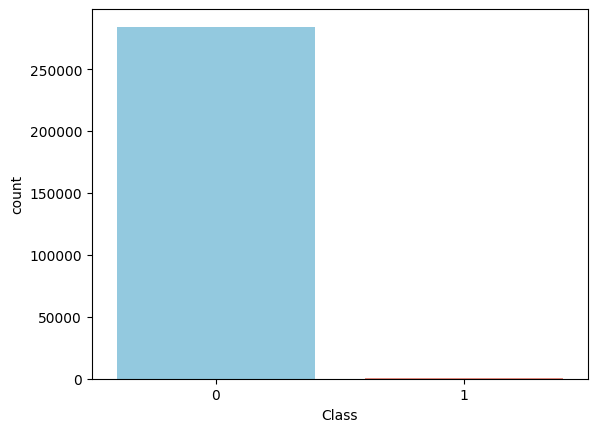

In [69]:
# distribution of classes in the dataset
print(credit_card_data['Class'].value_counts())
sns.countplot(x="Class", hue="Class", data=credit_card_data,
              palette={0: "skyblue", 1: "salmon"}, legend=False)

In [74]:
from imblearn.under_sampling import RandomUnderSampler

# split column for feature and target
X = credit_card_data.drop(columns=["Class"])
Y = credit_card_data["Class"]
# define undersample function
undersample = RandomUnderSampler(sampling_strategy=0.5)

Text(0.5, 0.98, 'Class repartition before and after undersampling')

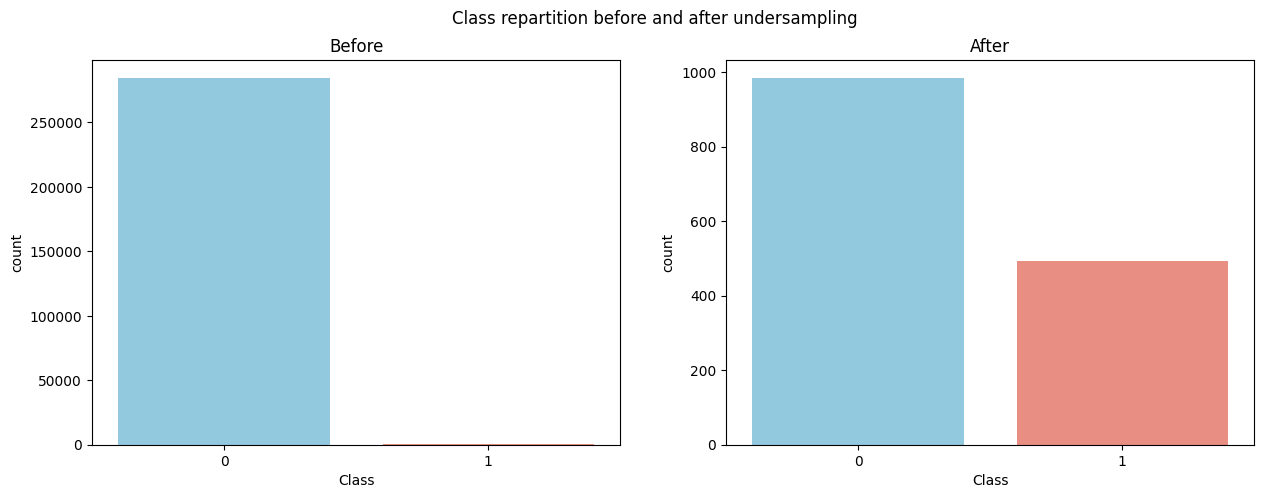

In [83]:
# undersample
X_under, Y_under = undersample.fit_resample(X, Y)

# visualize data distribution before and after undersampling
df_under = pd.DataFrame({"Class": y_under})
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x="Class", hue="Class", data=credit_card_data,
              palette={0: "skyblue", 1: "salmon"}, legend=False, ax=axes[0])
axes[0].set_title("Before")

sns.countplot(x="Class", hue="Class", data=df_under,
              palette={0: "skyblue", 1: "salmon"}, legend=False, ax=axes[1])
axes[1].set_title("After")

fig.suptitle("Class repartition before and after undersampling")

In [88]:
#spliting train/test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1, stratify=Y_under)


In [89]:
#standard scaling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train['std_Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape (-1,1))
X_test['std_Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1, 1))
#removing Amount
X_test = X_test.drop("Amount", axis=1)
X_train = X_train.drop("Amount", axis = 1)

In [101]:
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

#train the model
model = SVC(probability=True)
svm = model.fit(X_train, y_train)
#predict
y_predict = model.predict(X_test)
#scores
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test,y_predict))
print("F1 Score:",metrics.f1_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

Accuracy: 0.9662162162162162
Precision: 1.0
Recall: 0.898989898989899
F1 Score: 0.9468085106382979
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       197
           1       1.00      0.90      0.95        99

    accuracy                           0.97       296
   macro avg       0.98      0.95      0.96       296
weighted avg       0.97      0.97      0.97       296



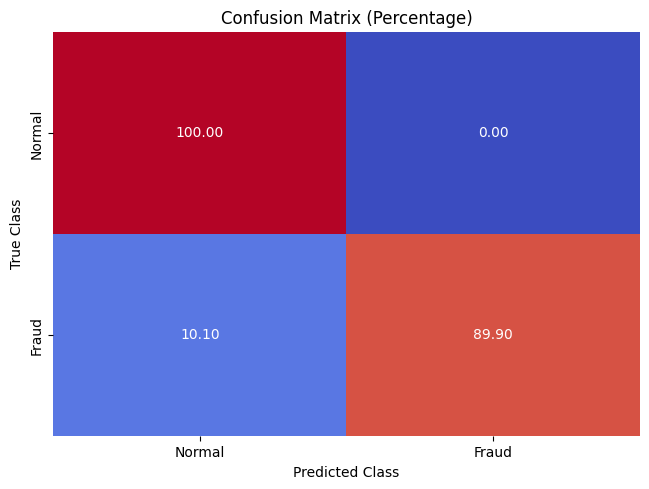

In [105]:
#Confusion matrix
matrix_svm = confusion_matrix(y_test, y_predict)
matrix_percentage = matrix_svm.astype('float') / matrix_svm.sum(axis=1)[:, np.newaxis] * 100
cm_svm = pd.DataFrame(matrix_percentage, index=['Normal', 'Fraud'], columns=['Normal', 'Fraud'])
sns.heatmap(cm_svm, annot=True, cbar=None, cmap="coolwarm", fmt='.2f')
plt.title("Confusion Matrix (Percentage)"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [109]:
#AUC
y_pred_svm_proba = model.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

AUC SVM : 0.9927190688612009


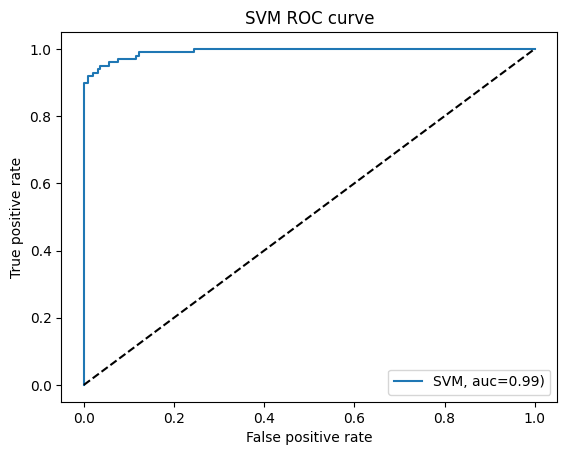

In [110]:
#ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.2f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()